In [1]:
import pandas as pd
pd.set_option("display.max_columns", 1000)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
import sys

Matplotlib created a temporary cache directory at /scratch/naotok/3243018/matplotlib-0bfzks6v because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
liang_df = pd.read_csv(

    "/rhome/naotok/bigdata/Upf2_paper/Liang/DE_gene_march22_withTtest",
    sep = "\t"

)

In [8]:
group = ["upf2_ko_wt", "upf2p53_ko_upf2_ko"]

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/scratch/naotok/3243018/ipykernel_3162467/1770040222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df[g + "_pt_log"] = -np.log10(tmp_df[g + "_pt"])
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/scratch/naotok/3243018/ipykernel_3162467/1770040222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

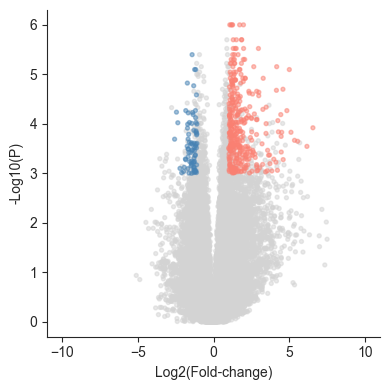

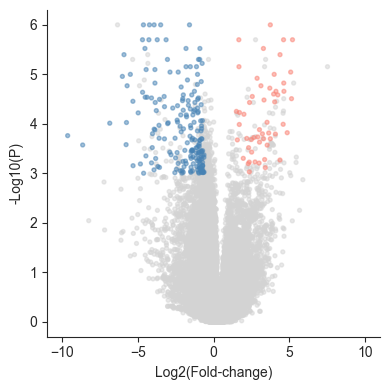

In [9]:
df_dict = {}
for g in group:
    
    tmp_df = liang_df[["name", g + "_pt", g + "_qc", g + "_DEb", g + "_TPMfd"]]
    tmp_df[g + "_pt_log"] = -np.log10(tmp_df[g + "_pt"])
    tmp_df[g + "_qc_log"] = -np.log10(tmp_df[g + "_qc"])
    tmp_df[g + "_TPMfd_log"] = np.log2(tmp_df[g + "_TPMfd"])
    # Color
#     tmp_df.loc[(tmp_df[g + "_qc"] < 0.05) & (tmp_df[g + "_TPMfd_log"] > 1), "color"] = "salmon"
    tmp_df.loc[tmp_df[g + "_DEb"] == 1, "color"] = "salmon"
#     tmp_df.loc[(tmp_df[g + "_qc"] < 0.05) & (tmp_df[g + "_TPMfd_log"] < -1), "color"] = "steelblue"
    tmp_df.loc[tmp_df[g + "_DEb"] == -1, "color"] = "steelblue"
    tmp_df = tmp_df.fillna({"color": "lightgrey"}).sort_values("color")
    tmp_df = tmp_df.dropna()

    # Volcano
    fig = plt.figure(figsize = (4, 4))
    ax = fig.add_subplot(111)

    ax = plt.scatter(

        data = tmp_df,
        x = g + "_TPMfd_log",
        y = g + "_pt_log",
        c = tmp_df["color"],
        alpha = 0.5,
        s = 8

    )

    plt.xlim(-11, 11)
    # plt.ylim(-1, 30)
    plt.xlabel("Log2(Fold-change)")
    plt.ylabel("-Log10(P)")

    sns.despine()
    plt.tight_layout()
    plt.savefig("/rhome/naotok/Upf2_paper/figure/NPC_Upf2_KO_RNAseq_volcano_" + g + ".png", dpi = 800)
    
    df_dict[g] = tmp_df